<a href="https://colab.research.google.com/github/asalunai/IoT-trabalho/blob/main/pre_proc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!git clone https://github.com/asalunai/IoT-trabalho.git

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns
import numpy as np

## Lista de Variáveis

| Variável     	| Nome                                        	| Unidade    	|
|--------------	|---------------------------------------------	|------------	|
| CD_ESTACAO   	| Código ID da estação                        	| -          	|
| CHUVA        	| Precipitação                                	| mm/h       	|
| DC_NOME      	| Nome da estação                             	| -          	|
| DT_MEDICAO   	| Data da medição                             	| aaaa-mm-dd 	|
| HR_MEDICAO   	| Hora da medição                             	| hhmm       	|
| PRE_INS      	| Pressão Atmosférica instantânea             	| hPa        	|
| PRE_MAX      	| Pressão Atmosférica máxima                  	| hPa        	|
| PRE_MIN      	| Pressão Atmosférica mínima                  	| hPa        	|
| PTO_INS      	| Temperatura do ponto de orvalho instantânea 	| ºC         	|
| PTO_MAX      	| Temperatura do ponto de orvalho máxima      	| ºC         	|
| PTO_MIN      	| Temperatura do ponto de orvalho mínima      	| ºC         	|
| RAD_GLO      	| Radiação Global                             	| J?         	|
| TEM_INS      	| Temperatura a 2 metros instantânea          	| ºC         	|
| TEM_MAX      	| Temperatura a 2 metros máxima               	| ºC         	|
| TEM_MIN      	| Temperatura a 2 metros mínima               	| ºC         	|
| UF           	| Unidade Federativa                          	| -          	|
| UMD_INS      	| Umidade Relativa do ar instantânea          	| %          	|
| UMD_MAX      	| Umidade Relativa do ar máxima               	| %          	|
| UMD_MIN      	| Umidade Relativa do ar mínima               	| %          	|
| VEN_DIR      	| Direção do Vento                            	| º          	|
| VEN_RAJ      	| Velocidade da Rajada de Vento               	| m/s        	|
| VEN_VEL      	| Velocidade do vento                         	| m/s        	|
| VL_LATITUDE  	| Latitude da estação                         	| º          	|
| VL_LONGITUDE 	| Longitude da estação                        	| º          	|


In [3]:
def abre_dados(nome_csv, colunas):
    # nome_csv: string com o nome do arquivo csv
    # colunas: tupla com o nome das colunas desejadas
    # Nota: a data da medição já é o index!!!
    # Ex: ['CD_ESTACAO',,'PRE_INS','PRE_MAX','PRE_MIN']
    # Ex: ['CD_ESTACAO','TEM_INS','TEM_MAX','TEM_MIN']

    # abre o arquivo csv:
    #path_dados = 'IoT-trabalho/dados/'
    path_dados = 'dados/'
    df = pd.read_csv(path_dados + nome_csv, index_col=0, encoding='latin')

    # formata data:
    df['HR_MEDICAO'] = df['HR_MEDICAO'].astype(str).str.zfill(4)
    df['HR_MEDICAO'] = df['HR_MEDICAO'].str[:2]
    df['DT_MEDICAO'] = df['DT_MEDICAO'] + ' ' + df['HR_MEDICAO'] + ':00'
    df.drop('HR_MEDICAO', axis=1, inplace=True)

    # Define a data da medição como index:
    df.set_index('DT_MEDICAO', inplace=True)

    # seleciona as colunas desejadas:
    df_t = df[colunas]

    return df_t

In [4]:
# Exemplo de dados:
cols = ['CD_ESTACAO','TEM_INS','TEM_MAX','TEM_MIN']
df = abre_dados('A606_2019-10.csv', cols)
display(df.head())

,CD_ESTACAO,TEM_INS,TEM_MAX,TEM_MIN
DT_MEDICAO,,,,
2019-10-01 00:00,A606,21.2,21.3,21.0
2019-10-01 01:00,A606,21.3,21.3,21.1
2019-10-01 02:00,A606,21.2,21.3,21.1
2019-10-01 03:00,A606,21.2,21.3,21.2
2019-10-01 04:00,A606,21.2,21.3,21.1


In [5]:
# Montando o DF com todas as estações
# Apenas para o mês Março/2020
# Depois eu monto pro resto do ano...

est_cod = ['A621', 'A618', 'A606', 'A609', 'A607']
cols = ['TEM_MAX','TEM_MIN']

try:
  del df_comp
except:
  pass

for est in est_cod:
  df = abre_dados(est+'_2020-03.csv', cols)
  df[est] = df.mean(axis=1)
  df.drop(df.columns[0:2], axis=1, inplace=True)
  #display(df.head(2))
  try:
    df_comp = pd.concat([df_comp, df] , axis=1)
  except:
    df_comp = df

display(df_comp.head())

# Calcula média e desvio padrão para cada linha
df_med = df_comp.mean(axis=1)
df_des = df_comp.std(axis=1)

display(df_med.head())
display(df_des.head())

,A621,A618,A606,A609,A607
DT_MEDICAO,,,,,
2020-03-01 00:00,23.55,19.05,24.40,21.10,23.85
2020-03-01 01:00,23.30,19.10,24.40,20.95,23.60
2020-03-01 02:00,23.20,19.10,24.40,20.95,23.55
2020-03-01 03:00,22.90,19.00,24.45,21.00,23.40
2020-03-01 04:00,22.80,19.05,24.35,20.95,23.25


DT_MEDICAO
2020-03-01 00:00    22.39
2020-03-01 01:00    22.27
2020-03-01 02:00    22.24
2020-03-01 03:00    22.15
2020-03-01 04:00    22.08
dtype: float64

DT_MEDICAO
2020-03-01 00:00    2.254828
2020-03-01 01:00    2.188493
2020-03-01 02:00    2.169505
2020-03-01 03:00    2.159861
2020-03-01 04:00    2.091531
dtype: float64

In [6]:
# Monta os DF com as anomalias superior e inferior

df_sup = df_med + df_des
df_inf = df_med - df_des

mask_sup = df_comp*0
mask_inf = df_comp*0

for col in df_comp.columns:
  mask_sup[col] = df_comp[col].gt(df_sup, axis='index')
  mask_inf[col] = df_comp[col].lt(df_inf, axis='index')

anom_sup = df_comp[mask_sup]
anom_inf = df_comp[mask_inf]

In [7]:
anom_sup.head()

,A621,A618,A606,A609,A607
DT_MEDICAO,,,,,
2020-03-01 00:00,NaN,NaN,NaN,NaN,NaN
2020-03-01 01:00,NaN,NaN,NaN,NaN,NaN
2020-03-01 02:00,NaN,NaN,NaN,NaN,NaN
2020-03-01 03:00,NaN,NaN,24.45,NaN,NaN
2020-03-01 04:00,NaN,NaN,24.35,NaN,NaN


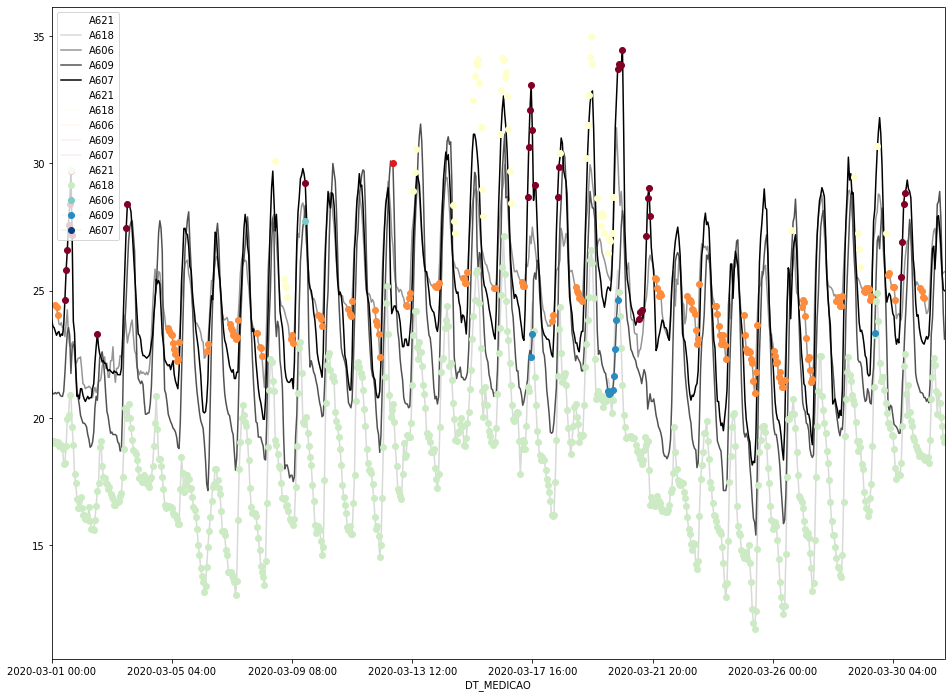

In [8]:
# Plotando as séries e as anomalias
# Série temporal: escala de cinza
# Anomalia superior: cores quentes
# Anomalia inferior: cores frias 

ax = df_comp.plot(figsize=(16,12), colormap='Greys')
ax = anom_sup.plot(colormap = 'YlOrRd', linewidth=0.1, marker = 'o', ax = ax)
ax = anom_inf.plot(colormap = 'GnBu', linewidth=0.1, marker = 'o', ax = ax)
plt.show()

In [9]:
def getAnomaliesExtremes(time):
    highAnomaly = None #max(anom_sup.loc[time])
    lowAnomaly = None #min(anom_inf.loc[time])
    
    for col in anom_sup.columns:
        tmpSup = anom_sup[col].loc[time]
        if not pd.isnull(tmpSup):
            try:
                if tmpSup > highAnomaly:
                    highAnomaly = tmpSup
            except:
                if not highAnomaly:
                    highAnomaly = tmpSup
        
        tmpInf = anom_inf[col].loc[time]
        if not pd.isnull(tmpInf):
            try:
                if tmpInf < lowAnomaly:
                    lowAnomaly = tmpInf
            except:
                if not lowAnomaly:
                    lowAnomaly = tmpInf
    
    return highAnomaly, lowAnomaly

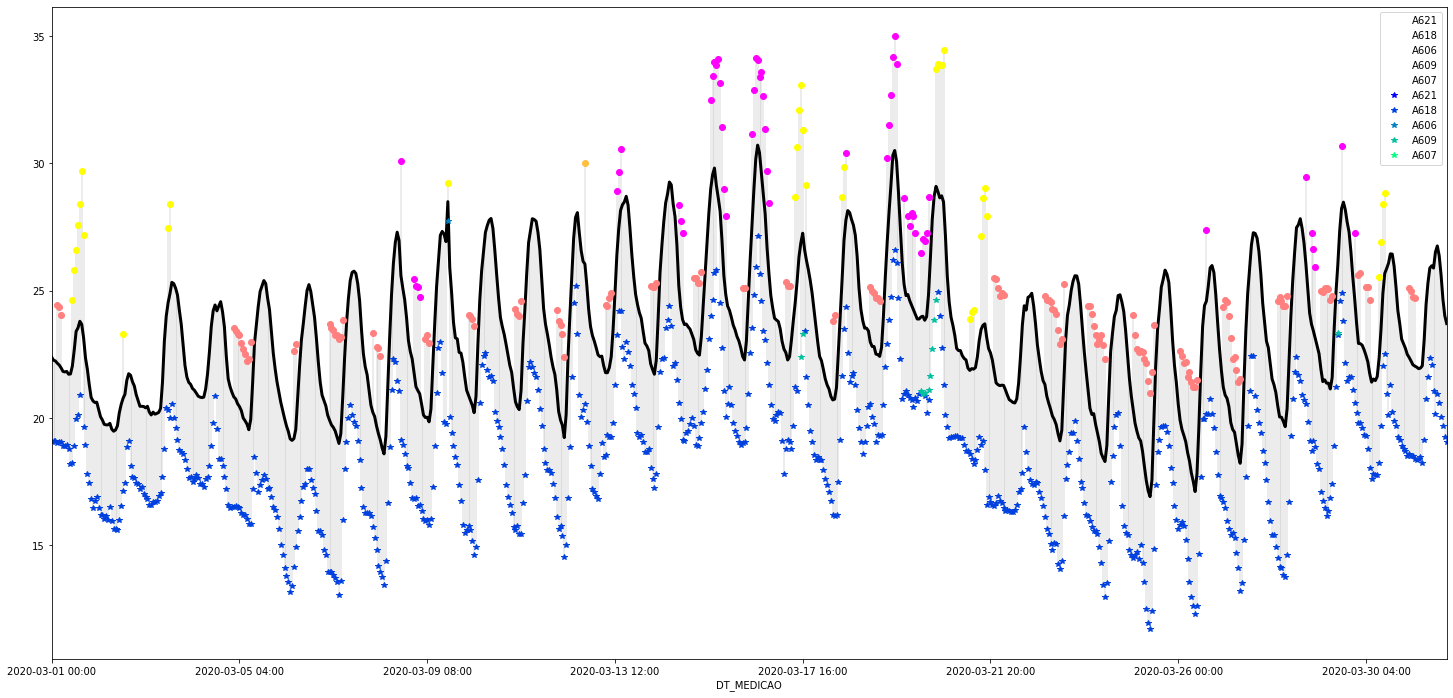

In [10]:
# Plotando a média e as anomalias
# Série temporal: escala de cinza
# Anomalia superior: cores quentes
# Anomalia inferior: cores frias 

#fig = Figure(figsize=(25,12))
fig, ax = plt.subplots(figsize=(25,12))

idx = 0
for time in df_med.index:
    hg, lw = getAnomaliesExtremes(time)
    
    if hg:
        plt.plot([idx, idx], [df_med.loc[time], hg], 'gray', linewidth=.3)
        
    if lw:
        plt.plot([idx, idx], [df_med.loc[time], lw], 'gray', linewidth=.3)
        
        
    idx += 1

df_med.plot(color='k', linewidth=3, ax = ax)

anom_sup.plot(colormap = 'spring', linewidth=0, marker = 'o', ax = ax)
anom_inf.plot(colormap = 'winter', linewidth=0, marker = '*', ax = ax)

#plt.grid(which='both', axis='x')
plt.savefig("teste.pdf")

plt.show()

# NOTE: Problema na legenda!

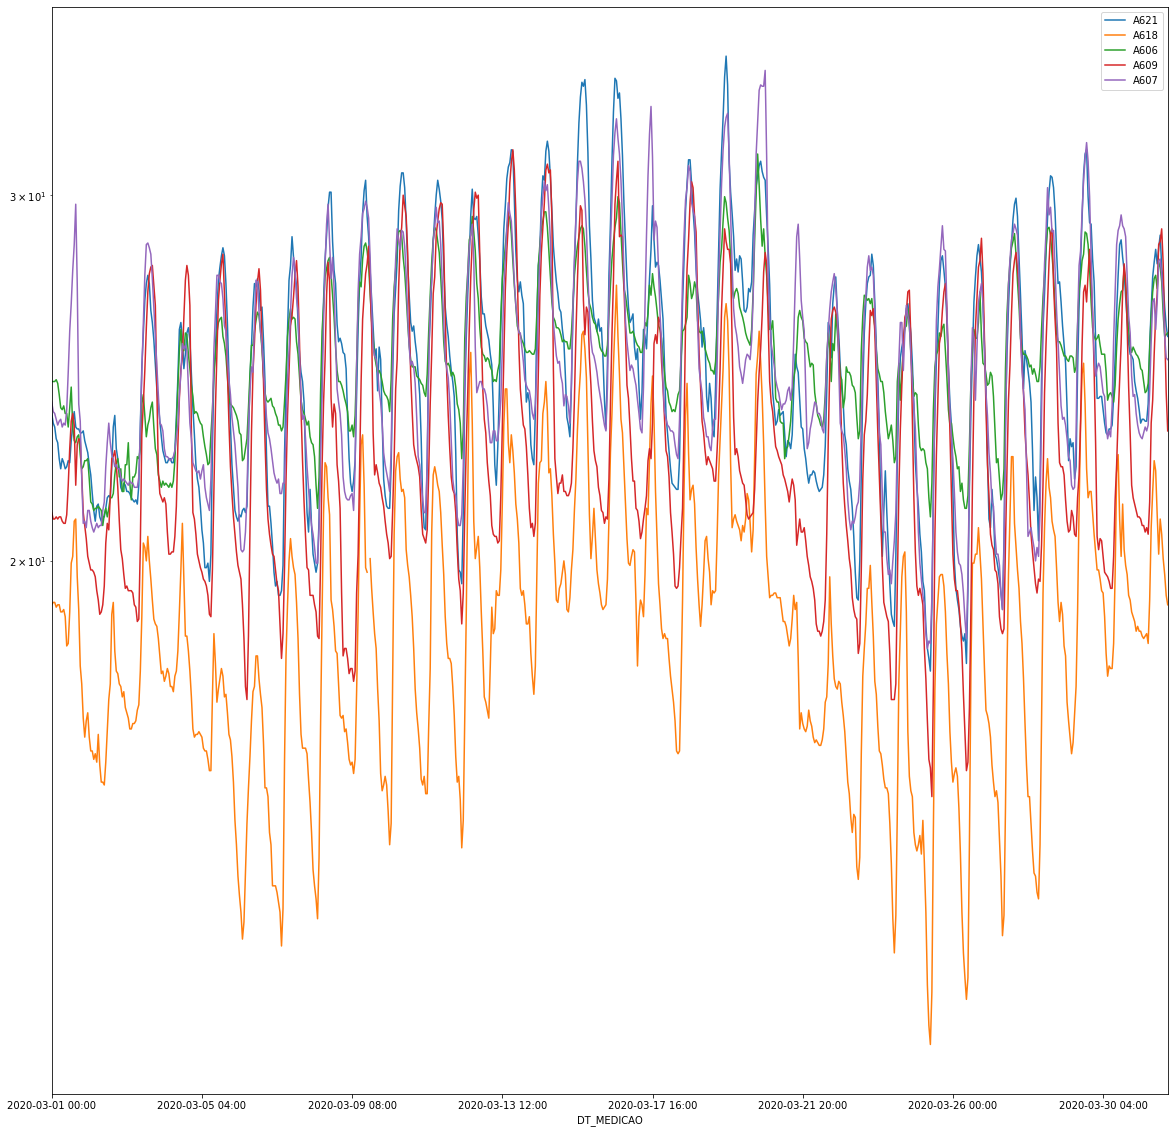

In [16]:
ax = df_comp.plot(figsize=(20,20))#, colormap='Greys')

plt.yscale('log')

# Se for analisada desta forma mesmo, A618 precisa ser separada
# Possivelmente A606 também... Ele apresenta consistentemente anomalias em "vales" da medição de temperatura

## Considerações

A gente pode trabalhar somente com as máximas e as mínimas diárias

E também podemos trabalha com o gradiante temporal da temperatura, ao invés do valor dela do dia, ou seja: $Tmax_{hoje}-Tmax_{ontem}$

Se eu tiver tempo eu faço isso mais tarde.



In [49]:
# Trabalhando com máxima e mínima diárias:


est_cod = ['A621', 'A618', 'A606', 'A609', 'A607']
colunas = ['TEM_MAX','TEM_MIN']


def abre_dados_dia(nome_csv):
    # nome_csv: string com o nome do arquivo csv
    # colunas: tupla com o nome das colunas desejadas
    # Nota: a data da medição já é o index!!!
    # Ex: ['CD_ESTACAO',,'PRE_INS','PRE_MAX','PRE_MIN']
    # Ex: ['CD_ESTACAO','TEM_INS','TEM_MAX','TEM_MIN']

    # abre o arquivo csv:
    #path_dados = 'IoT-trabalho/dados/'
    path_dados = 'dados/'
    df = pd.read_csv(path_dados + nome_csv, index_col=0, encoding='latin')
    
    df.drop('HR_MEDICAO', axis=1, inplace=True)

    # Define a data da medição como index:
    df.set_index('DT_MEDICAO', inplace=True)
    
    
    # formata data:
    # Quero as maximas e minimas de cada dia df['DT_MEDICAO']
    df = df.groupby('DT_MEDICAO').agg({'TEM_MAX':'max', 'TEM_MIN':'min'})
    

    # seleciona as colunas desejadas:
    df_t = df[colunas]

    return df_t



try:
  del df_comp_dia, df_comp_dia_max, df_comp_dia_min
except:
  pass

for est in est_cod:
  df = abre_dados_dia(est+'_2020-03.csv')
  dfMin = df.copy()
  dfMax = df.copy()
  df[est] = df.mean(axis=1)
  dfMin[est] = dfMin['TEM_MIN']
  dfMax[est] = dfMax['TEM_MAX']
  df.drop(df.columns[0:2], axis=1, inplace=True)
  dfMin.drop(dfMin.columns[0:2], axis=1, inplace=True)
  dfMax.drop(dfMax.columns[0:2], axis=1, inplace=True)
  try:
    df_comp_dia = pd.concat([df_comp_dia, df] , axis=1)
    df_comp_dia_min = pd.concat([df_comp_dia_min, dfMin] , axis=1)
    df_comp_dia_max = pd.concat([df_comp_dia_max, dfMax] , axis=1)
  except:
    df_comp_dia = df
    df_comp_dia_min = dfMin
    df_comp_dia_max = dfMax

display(df_comp_dia.head())
display(df_comp_dia_min.head())
display(df_comp_dia_max.head())

# Calcula média e desvio padrão para cada linha
df_med = df_comp_dia.mean(axis=1)
df_des = df_comp_dia.std(axis=1)

display(df_med.head())
display(df_des.head())

,A621,A618,A606,A609,A607
DT_MEDICAO,,,,,
2020-03-01,22.95,19.00,23.15,22.30,25.55
2020-03-02,22.40,17.70,21.70,21.00,22.20
2020-03-03,24.55,18.85,22.85,23.55,25.40
2020-03-04,24.55,19.05,23.90,24.45,23.95
2020-03-05,24.00,17.40,24.35,23.80,24.65


,A621,A618,A606,A609,A607
DT_MEDICAO,,,,,
2020-03-01,21.9,15.9,21.7,20.2,20.4
2020-03-02,20.7,15.3,20.7,18.8,20.6
2020-03-03,21.2,16.5,21.0,18.5,21.6
2020-03-04,22.1,16.3,21.5,20.1,21.8
2020-03-05,19.1,15.5,22.0,18.5,21.1


,A621,A618,A606,A609,A607
DT_MEDICAO,,,,,
2020-03-01,24.0,22.1,24.6,24.4,30.7
2020-03-02,24.1,20.1,22.7,23.2,23.8
2020-03-03,27.9,21.2,24.7,28.6,29.2
2020-03-04,27.0,21.8,26.3,28.8,26.1
2020-03-05,28.9,19.3,26.7,29.1,28.2


DT_MEDICAO
2020-03-01    22.59
2020-03-02    21.00
2020-03-03    23.04
2020-03-04    23.18
2020-03-05    22.84
dtype: float64

DT_MEDICAO
2020-03-01    2.354623
2020-03-02    1.922238
2020-03-03    2.534857
2020-03-04    2.326908
2020-03-05    3.058472
dtype: float64

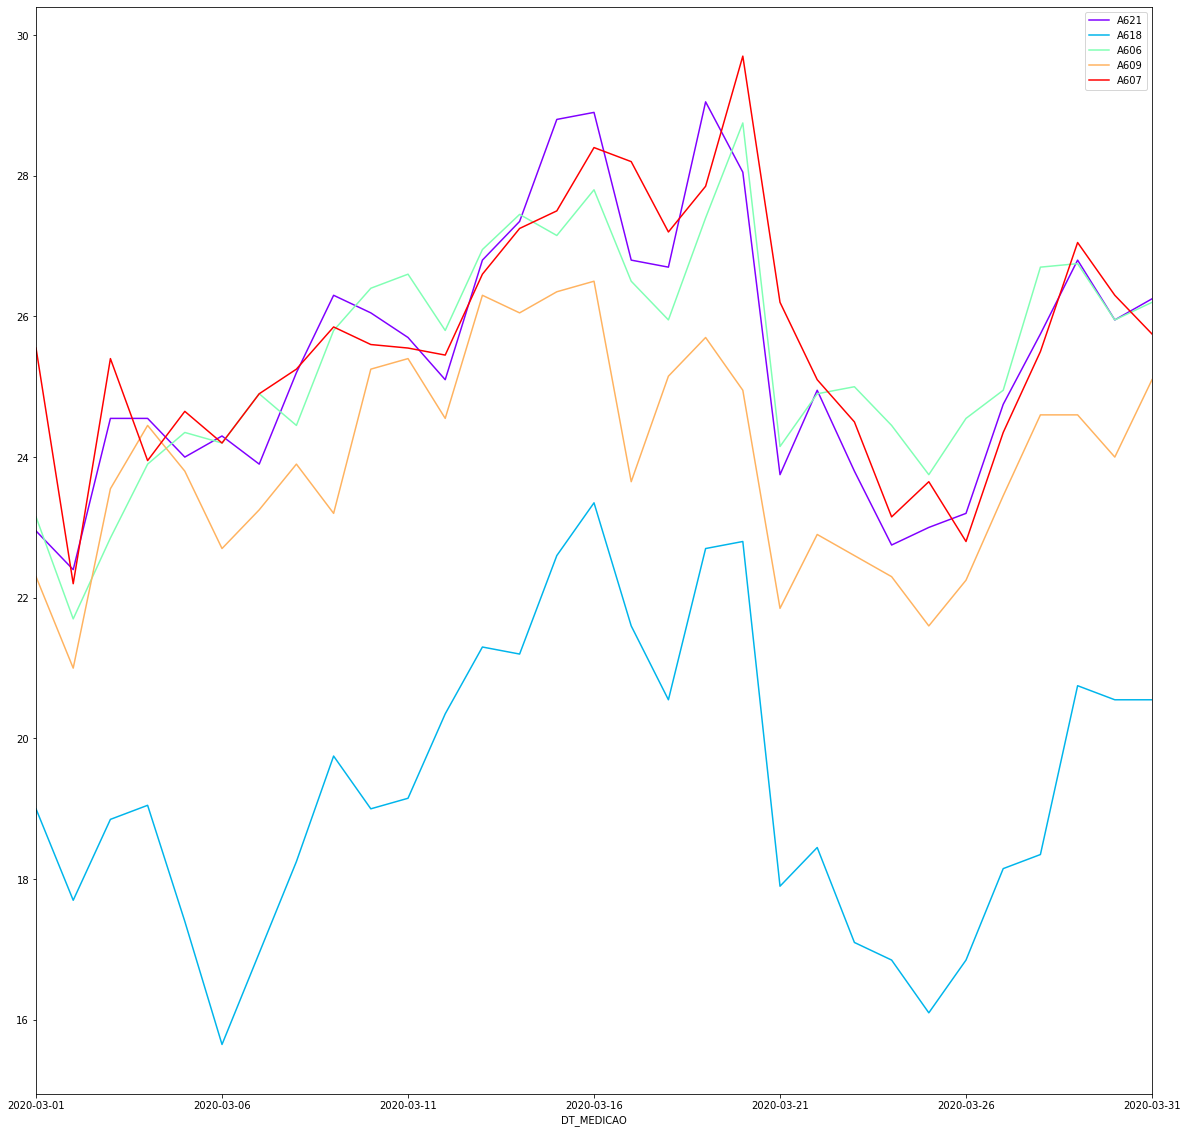

In [64]:
ax = df_comp_dia.plot(figsize=(20,20), colormap='rainbow')

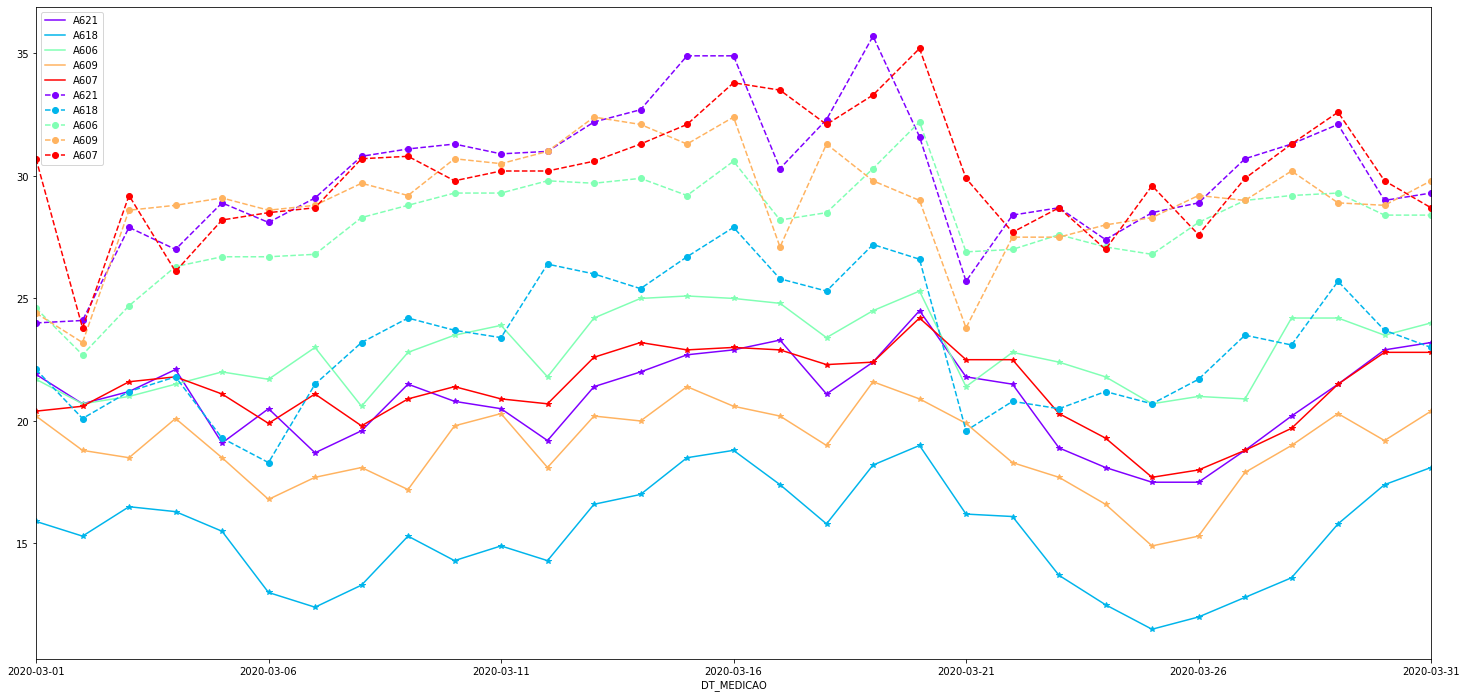

In [63]:
fig, ax = plt.subplots(figsize=(25,12))

cmap = 'rainbow'

ax = df_comp_dia_min.plot(ax=ax, marker='*', colormap=cmap)
ax = df_comp_dia_max.plot(ax=ax, marker='o', linestyle='--', colormap=cmap)